# Boolean Indexing

## 1. 조건 인덱싱

### 1.1 단일 조건 인덱싱 

In [1]:
import pandas as pd
import numpy as np

In [8]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')

In [25]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,PG-13,NaN,NaN,12.0,7.1,NaN,0


In [10]:
movie_hours = movie['duration']>120
movie_hours.sum()

1039

In [11]:
movie_hours.mean()

0.2113506916192026

In [13]:
movie['duration'].gt(120).mean()#'gt(>)'의 반대,'lt(<)'

0.2113506916192026

In [14]:
movie['duration'].dropna().gt(120).mean()

0.21199755152009794

### 1.2 조건 기반 필터링

In [26]:
cr1 = movie.imdb_score>8
cr2 = movie.content_rating == 'PG-13'
cr3 = ((movie.title_year < 2000) | (movie.title_year>2009))
# Pandas 논리연산자 [AND(&), OR(I), NOT(~)]
# 기본 연산자를 사용할 경우 객체 전체의 참을 계산하기 때문에
# 각 표현은 괄호로 묶여 있어야 오류가 발생하지 않음.

In [27]:
cr = cr1& cr2 & cr3
cr.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [31]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4916 entries, Avatar to My Date with Drew
Data columns (total 27 columns):
color                        4897 non-null object
director_name                4814 non-null object
num_critic_for_reviews       4867 non-null float64
duration                     4901 non-null float64
director_facebook_likes      4814 non-null float64
actor_3_facebook_likes       4893 non-null float64
actor_2_name                 4903 non-null object
actor_1_facebook_likes       4909 non-null float64
gross                        4054 non-null float64
genres                       4916 non-null object
actor_1_name                 4909 non-null object
num_voted_users              4916 non-null int64
cast_total_facebook_likes    4916 non-null int64
actor_3_name                 4893 non-null object
facenumber_in_poster         4903 non-null float64
plot_keywords                4764 non-null object
movie_imdb_link              4916 non-null object
num_user_for_reviews     

### 1.3 조건 기반 필터링

In [32]:
movie[cr].head().T

movie_title,The Dark Knight Rises,The Avengers,Captain America: Civil War,Toy Story 3,Inside Out
color,Color,Color,Color,Color,Color
director_name,Christopher Nolan,Joss Whedon,Anthony Russo,Lee Unkrich,Pete Docter
num_critic_for_reviews,813,703,516,453,536
duration,164,173,147,103,95
director_facebook_likes,22000,0,94,125,0
actor_3_facebook_likes,23000,19000,11000,721,384
actor_2_name,Christian Bale,Robert Downey Jr.,Scarlett Johansson,John Ratzenberger,Mindy Kaling
actor_1_facebook_likes,27000,26000,21000,15000,1000
gross,4.48131e+08,6.2328e+08,4.07197e+08,4.14984e+08,3.56454e+08
genres,Action|Thriller,Action|Adventure|Sci-Fi,Action|Adventure|Sci-Fi,Adventure|Animation|Comedy|Family|Fantasy,Adventure|Animation|Comedy|Drama|Family|Fantasy


In [36]:
cols =['imdb_score','comtent_rating','title_year']
movie.loc[cr, cols].head()

,imdb_score,comtent_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,NaN,2012.0
The Avengers,8.1,NaN,2012.0
Captain America: Civil War,8.2,NaN,2016.0
Toy Story 3,8.3,NaN,2010.0
Inside Out,8.3,NaN,2015.0


In [43]:
movie.iloc[cr.values, range(10)].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres
movie_title,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi
Toy Story 3,Color,Lee Unkrich,453.0,103.0,125.0,721.0,John Ratzenberger,15000.0,414984497.0,Adventure|Animation|Comedy|Family|Fantasy
Inside Out,Color,Pete Docter,536.0,95.0,0.0,384.0,Mindy Kaling,1000.0,356454367.0,Adventure|Animation|Comedy|Drama|Family|Fantasy


## 2.인덱스 기반 조건 사용

In [39]:
college = pd.read_csv('data/college.csv')
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,...,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,...,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,...,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,...,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
4,Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,...,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [44]:
college[college['STABBR']=='TX']


,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5
3615,Arlington Baptist College,Arlington,TX,0.0,0.0,0.0,1,NaN,NaN,0.0,...,0.0000,0.0047,0.0000,0.1682,1,0.4978,0.4892,0.2251,34200,22905
3616,Arlington Career Institute,Grand Prairie,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0000,0.2843,1,0.6186,0.7119,0.7745,27600,9500
3617,The Art Institute of Houston,Houston,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0000,0.0419,0.3466,1,0.6183,0.7604,0.3845,32600,30750
3618,Austin College,Sherman,TX,0.0,0.0,0.0,1,600.0,595.0,0.0,...,0.0031,0.0267,0.0031,0.0016,1,0.2867,0.7581,0.0124,47800,26000
3619,Austin Community College District,Austin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0233,0.0335,0.0532,0.7340,1,0.2393,0.2447,0.3914,34400,8601.5


In [50]:
college2 = college.set_index('STABBR')
college2.loc['TX']

## 기억해놓기! 과제가 될수도 있어~_~

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5
TX,Arlington Baptist College,Arlington,0.0,0.0,0.0,1,NaN,NaN,0.0,214.0,...,0.0000,0.0047,0.0000,0.1682,1,0.4978,0.4892,0.2251,34200,22905
TX,Arlington Career Institute,Grand Prairie,0.0,0.0,0.0,0,NaN,NaN,0.0,204.0,...,0.0000,0.0000,0.0000,0.2843,1,0.6186,0.7119,0.7745,27600,9500
TX,The Art Institute of Houston,Houston,0.0,0.0,0.0,0,NaN,NaN,0.0,1887.0,...,0.0000,0.0000,0.0419,0.3466,1,0.6183,0.7604,0.3845,32600,30750
TX,Austin College,Sherman,0.0,0.0,0.0,1,600.0,595.0,0.0,1272.0,...,0.0031,0.0267,0.0031,0.0016,1,0.2867,0.7581,0.0124,47800,26000


In [45]:
%timeit college[college['STABBR']=='TX']

3.15 ms ± 372 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [49]:
%timeit college2.loc['TX']

1.14 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [51]:
college.index = college['CITY'] + ','+ college['STABBR']
college = college.sort_index()
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"ARTESIA,CA",Angeles Institute,ARTESIA,CA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0175,0.0088,0.0088,0.0000,1,0.6275,0.8138,0.5429,NaN,16850
"Aberdeen,SD",Presentation College,Aberdeen,SD,0.0,0.0,0.0,1,440.0,480.0,0.0,...,0.0284,0.0142,0.0823,0.2865,1,0.4829,0.7560,0.3097,35900,25000
"Aberdeen,SD",Northern State University,Aberdeen,SD,0.0,0.0,0.0,0,480.0,475.0,0.0,...,0.0219,0.0425,0.0024,0.1872,1,0.2272,0.4303,0.1766,33600,24847
"Aberdeen,WA",Grays Harbor College,Aberdeen,WA,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0937,0.0009,0.0250,0.1820,1,0.4530,0.1502,0.5087,27000,11490
"Abilene,TX",Hardin-Simmons University,Abilene,TX,0.0,0.0,0.0,1,508.0,515.0,0.0,...,0.0298,0.0159,0.0102,0.0685,1,0.3256,0.5547,0.0982,38700,25864


In [52]:
college.loc['Miami,FL'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami,FL",New Professions Technical Institute,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.4464,1,0.8701,0.6780,0.8358,18700,8682
"Miami,FL",Management Resources College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.0000,1,0.4239,0.5458,0.8698,PrivacySuppressed,12182
"Miami,FL",Strayer University-Doral,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,49200,36173.5
"Miami,FL",Keiser University- Miami,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,29700,26063
"Miami,FL",George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0046,0.0,0.0,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


In [54]:
college.loc['Miami,FL'].head() # ''안에서는 띄어쓰기를 잘못해도 에러가 난다 카더라

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami,FL",New Professions Technical Institute,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.4464,1,0.8701,0.6780,0.8358,18700,8682
"Miami,FL",Management Resources College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0,0.0,0.0000,1,0.4239,0.5458,0.8698,PrivacySuppressed,12182
"Miami,FL",Strayer University-Doral,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,49200,36173.5
"Miami,FL",Keiser University- Miami,Miami,FL,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,29700,26063
"Miami,FL",George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0046,0.0,0.0,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


## 3. 주가 탐색 그래프 생성 

In [58]:
slb = pd.read_csv('data/slb_stock.csv', index_col = 'Date', parse_dates=['Date'])
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [59]:
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles=[0.1,0.9])#10%~90% 까지 보여주!
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [62]:
up_10 = slb_summary.loc['90%']
low_10 = slb_summary.loc['10%']
criteria = (slb_close < low_10) | (slb_close > up_10)
slb_10 = slb_close[criteria]

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

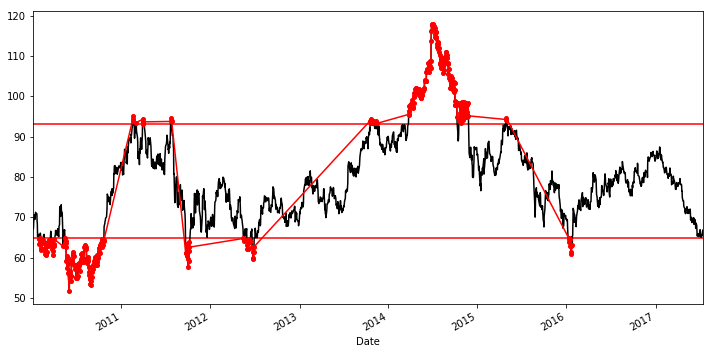

In [67]:
slb_close.plot(color='black', figsize=(12,6))
slb_10.plot(marker='o', ms=4, color='red')
xmin=criteria.index[0]
xmax = criteria.index[-1]
plt.hlines(y=[low_10, up_10], xmin=xmin, xmax=xmax, color = 'red');

# Boolean Indexing ||

## 1. 데이터 필터링

### 1.1. 포함관계

In [72]:
employee = pd.read_csv('data/employee.csv')

In [73]:
employee.DEPARTMENT.value_counts()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Parks & Recreation                 74
Solid Waste Management             43
Library                            36
Fleet Management Department        36
Admn. & Regulatory Affairs         29
Municipal Courts Department        28
Human Resources Dept.              24
Houston Emergency Center (HEC)     23
Housing and Community Devp.        22
General Services Department        22
Legal Department                   17
Dept of Neighborhoods (DON)        17
City Council                       11
Finance                            10
Houston Information Tech Svcs       9
Planning & Development              7
Mayor's Office                      5
City Controller's Office            5
Convention and Entertainment        1
Name: DEPARTMENT, dtype: int64

In [74]:
depts = ['Houston Fire Department (HFD)','Library']

In [76]:
c_depts = employee.DEPARTMENT.isin(depts)
c_gender = employee.GENDER == 'Female'

In [77]:
employee.loc[c_depts&c_gender].head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
61,61,IT PROJECT MANAGER,Houston Fire Department (HFD),96668.0,Black or African American,Full Time,Female,Active,1998-04-07,2006-01-28
101,101,CUSTOMER SERVICE CLERK,Library,NaN,NaN,Part Time,Female,Active,2016-02-29,2016-02-29
135,135,FIRE FIGHTER,Houston Fire Department (HFD),51194.0,Hispanic/Latino,Full Time,Female,Active,2009-07-27,2010-10-27
225,225,ADMINISTRATIVE SPECIALIST,Houston Fire Department (HFD),58040.0,Hispanic/Latino,Full Time,Female,Active,1995-05-23,2015-11-21


In [80]:
c_sal = employee.BASE_SALARY.between(8000, 120000)

In [82]:
employee.loc[c_depts&c_gender&c_sal].head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
61,61,IT PROJECT MANAGER,Houston Fire Department (HFD),96668.0,Black or African American,Full Time,Female,Active,1998-04-07,2006-01-28
135,135,FIRE FIGHTER,Houston Fire Department (HFD),51194.0,Hispanic/Latino,Full Time,Female,Active,2009-07-27,2010-10-27
225,225,ADMINISTRATIVE SPECIALIST,Houston Fire Department (HFD),58040.0,Hispanic/Latino,Full Time,Female,Active,1995-05-23,2015-11-21
226,226,SENIOR CAPTAIN,Houston Fire Department (HFD),74270.0,White,Full Time,Female,Active,2001-12-26,2014-02-15


## 1.2 Query 메서드

In [85]:
qs = "DEPARTMENT in @depts and GENDER == 'Female' and 80000 <= BASE_SALARY <= 120000"
employee.query(qs)

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
61,61,IT PROJECT MANAGER,Houston Fire Department (HFD),96668.0,Black or African American,Full Time,Female,Active,1998-04-07,2006-01-28
1165,1165,DEPUTY ASSISTANT DIRECTOR (EXECUTIVE LEV,Library,107763.0,Black or African American,Full Time,Female,Active,1993-11-16,2014-03-15


### 1.3 값을 유지하면서 필터링

In [87]:
%matplotlib inline

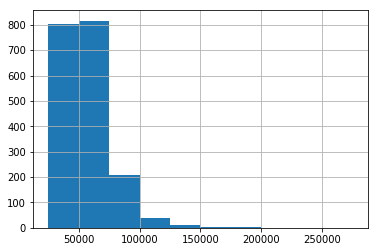

In [88]:
employee.BASE_SALARY.hist()

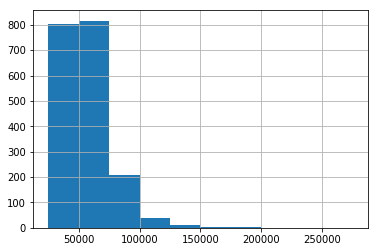

In [90]:
employee.BASE_SALARY.hist();

In [91]:
(employee.BASE_SALARY<100000).mean()

0.914

In [92]:
c = (employee.BASE_SALARY<100000)

In [93]:
employee.BASE_SALARY.where(c, other = 100000).describe()

count      2000.000000
mean      57508.212500
std       20767.163526
min       24960.000000
25%       40799.500000
50%       55461.000000
75%       66614.000000
max      100000.000000
Name: BASE_SALARY, dtype: float64

In [94]:
employee.BASE_SALARY.clip(lower=30000, upper=200000).describe()

count      1886.000000
mean      55884.096501
std       21110.095969
min       30000.000000
25%       40170.000000
50%       54461.000000
75%       66614.000000
max      200000.000000
Name: BASE_SALARY, dtype: float64

# Aggregation

### 파생변수 만들기 종합 
### 단일열 기준 종합 

In [101]:
flights = pd.read_csv('data/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [110]:
flights.groupby('AIRLINE').agg({'ARR_DELAY':'mean'})

,ARR_DELAY
AIRLINE,
AA,5.542661
AS,-0.833333
B6,8.692593
DL,0.339691
EV,7.034580
F9,13.630651
HA,4.972973
MQ,6.860591
NK,18.436070


In [111]:
flights.groupby('AIRLINE')['ARR_DELAY'].agg('mean')

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64

In [113]:
flights.groupby('AIRLINE')['ARR_DELAY'].agg(np.mean)

AIRLINE
AA     5.542661
AS    -0.833333
B6     8.692593
DL     0.339691
EV     7.034580
F9    13.630651
HA     4.972973
MQ     6.860591
NK    18.436070
OO     7.593463
UA     7.765755
US     1.681105
VX     5.348884
WN     6.397353
Name: ARR_DELAY, dtype: float64